In [46]:
import pandas as pd
df=pd.read_csv('data.csv.csv')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [47]:
df.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

In [48]:
df.duplicated().sum()

np.int64(6)

In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.value_counts

<bound method DataFrame.value_counts of                                                Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5836 rows x 2 columns]>

In [51]:
# it is used to remove the punchuation(string.punchuation)
import string
import re
punctuation=string.punctuation
p=punctuation.replace('$','').replace('%','')
p

'!"#&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords =stopwords.words('english')
len(english_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


198

In [53]:
from nltk.stem import PorterStemmer
porter=PorterStemmer()

In [54]:
# cleaning of data 
def clean_text(x):
    a=x.lower().strip()
    pattern=r"https?://\S+|www\.\S+"
    a=re.sub(pattern,'',a)
    for i in a:
        if i in p:
            a=a.replace(i,"")
    if '%' in a:
        a=a.replace('%','percent')
    text=nltk.word_tokenize(a)
    for i in text:
        if i in english_stopwords:
            text.remove(i)
    for i in range(len(text)):
        text[i]=porter.stem(text[i])
    return " ".join(text)
df['text']=df['Sentence'].apply(clean_text)

In [55]:
df.sample(12)

,Sentence,Sentiment,text
1448,The webcast may be followed online on the comp...,neutral,webcast may follow onlin the compani websit
5086,Atria will also buy the shares of Kauhajoen Te...,neutral,atria also buy share kauhajoen teurastamokiint...
4312,"According to Schmardin , Nordea will most like...",positive,accord schmardin nordea most like tri win cust...
2288,Asian traffic declined by 3.4 per cent .,negative,asian traffic declin 34 per cent
219,Net sales in 2008 are expected to be on the sa...,neutral,net sale 2008 expect be the level in 2007
3330,They are responsible for their own operations ...,neutral,are respons their oper custom relationship the...
1922,30 November 2009 - Finnish office furniture ma...,negative,30 novemb 2009 finnish offic furnitur maker ma...
4318,"$TSLA TO RECALL 2,700 MODEL X SUVS FOR SEAT-BE...",negative,$ tsla recal 2700 model x suv seatbelt fix
3657,Net sales of Finnish food industry company L+ñ...,positive,net sale finnish food industri compani lñnnen ...
885,Group EBIT for the first half was EUR13 .6 m U...,neutral,group ebit the first half eur13 6 us $ 178 fal...


In [56]:
from cleanning import clean_text
clean_text('hi am jagruti')

'hi jagruti'

In [57]:
def word(x):
    return len(x.split(" "))
df['word']=df['Sentence'].apply(word)

<Axes: xlabel='word', ylabel='Density'>

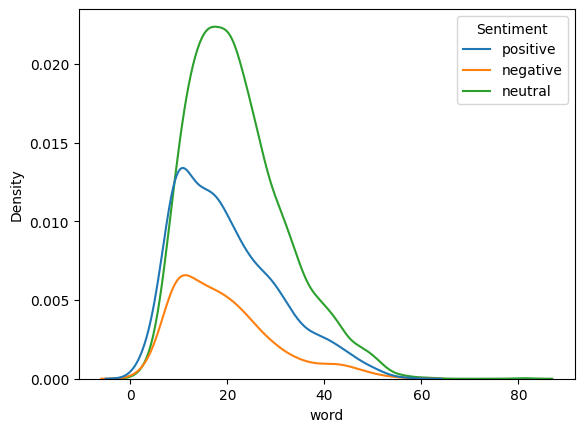

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
# KDEplot 
sns.kdeplot(data=df,x=df['word'],hue=df['Sentiment'])

<Axes: xlabel='Sentiment', ylabel='word'>

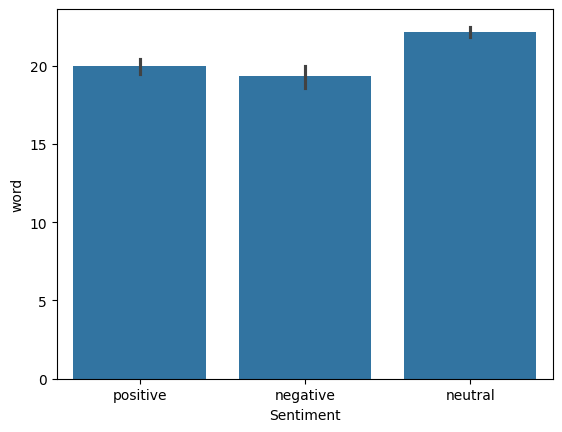

In [59]:
# bar plot
import numpy as np
sns.barplot(data=df,y=df['word'],x=df['Sentiment'],estimator=np.mean)

In [60]:
dict={}
def word_p(x):
    a=x.split(" ")
    for i in a:
        if i in dict:
            dict[i]=dict[i]+1
        else:
            dict[i]=1
df['text'].apply(word_p)


0       None
1       None
2       None
3       None
4       None
        ... 
5837    None
5838    None
5839    None
5840    None
5841    None
Name: text, Length: 5836, dtype: object

In [61]:
dict

{'geosolut': 2,
 'technolog': 125,
 'leverag': 3,
 'benefon': 9,
 'gp': 6,
 'solut': 154,
 'provid': 142,
 'locat': 40,
 'base': 87,
 'search': 6,
 'commun': 77,
 'platform': 14,
 'relev': 6,
 'multimedia': 3,
 'content': 24,
 'a': 847,
 'new': 274,
 'power': 49,
 'commerci': 32,
 'model': 45,
 '$': 1321,
 'esi': 1,
 'low': 39,
 '150': 18,
 '250': 11,
 'bk': 2,
 'real': 35,
 'possibl': 14,
 'the': 3362,
 'last': 105,
 'quarter': 317,
 '2010': 245,
 'componenta': 23,
 'net': 499,
 'sale': 607,
 'doubl': 22,
 'eur131m': 1,
 'eur76m': 1,
 'period': 334,
 'year': 377,
 'earlier': 103,
 'it': 446,
 'move': 60,
 'zero': 1,
 'pretax': 56,
 'profit': 605,
 'loss': 233,
 'eur7m': 3,
 'accord': 127,
 'finnishrussian': 1,
 'chamber': 2,
 'commerc': 4,
 'major': 54,
 'construct': 98,
 'compani': 914,
 'finland': 318,
 'oper': 633,
 'russia': 74,
 'swedish': 40,
 'buyout': 10,
 'firm': 35,
 'sold': 33,
 'remain': 59,
 '224': 3,
 'percent': 645,
 'stake': 67,
 'almost': 22,
 'eighteen': 1,
 'month':

In [62]:
# sorted_dict=dict(sorted(dict.items(),key=lambda item: item[1]))

In [63]:
# it is used to similae as string
#nltk.download('punkt_tab')
#nltk.word_tokenize('Hi am  a jagruti',language='english',preserve_line=False)



In [64]:
df.drop(['word','Sentence'],axis=1,inplace=True)

In [65]:
df

,Sentiment,text
0,positive,geosolut technolog leverag benefon gp solut pr...
1,negative,$ esi low $ 150 $ 250 bk real possibl
2,positive,the last quarter 2010 componenta net sale doub...
3,neutral,accord the finnishrussian chamber commerc the ...
4,neutral,swedish buyout firm sold remain 224 percent st...
...,...,...
5837,negative,rise cost forc packag produc huhtamaki axe 90 ...
5838,neutral,nordic walk first use a summer train method cr...
5839,neutral,accord ship compani vike line eu decis have si...
5840,neutral,the build home improv trade sale decreas 225 p...


In [79]:
# Applying Feature engineering
# label encoder to target columns
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(df['Sentiment'])
df['Sentiment']=l.transform(df['Sentiment']) # changing the numbers positive=2,neagtive=0and neutral=1

In [80]:
from sklearn.model_selection import train_test_split
x=df['text']
y=df['Sentiment']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [81]:
xtest.to_csv('testing.csv')

In [82]:
ytest.to_csv('testing_answer.csv')

In [83]:
xtrain.shape,ytrain.shape

((4668,), (4668,))

In [71]:
#from sklearn.feature_extraction .text import TfidfVectorizer
#T=TfidfVectorizer(max_features=5000,ngram_range=(1,2))
#T.fit(xtrain)
#xtrain=T.transform(xtrain).toarray()




In [84]:
from sklearn.feature_extraction.text import CountVectorizer
c=CountVectorizer(ngram_range=(1,2),max_features=5000)
c.fit(xtrain)
xtrain=c.transform(xtrain).todense()

In [85]:
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier 
from sklearn.svm import SVC
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')#53
g=GaussianNB() #54
m=MultinomialNB() #68
b=BernoulliNB() #67
l=LogisticRegression(max_iter=1000)
gr=GradientBoostingClassifier() #66
r=RandomForestClassifier()#65
s=SVC() #66


In [86]:
stratified=StratifiedKFold(n_splits=5)
scores=cross_val_score(cv = stratified,X = np.array(xtrain),y = np.array(ytrain),scoring = "accuracy",estimator = m)

In [87]:
scores.mean()

np.float64(0.6820853731028136)